In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai import *
from fastai.text import *

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jigsaw-toxic-comment-classification-challenge/test_labels.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv.zip


In [2]:
path = Path('/kaggle/input/jigsaw-toxic-comment-classification-challenge')
path.ls()

[PosixPath('/kaggle/input/jigsaw-toxic-comment-classification-challenge/test_labels.csv.zip'),
 PosixPath('/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip'),
 PosixPath('/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv.zip'),
 PosixPath('/kaggle/input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv.zip')]

In [3]:
!mkdir data
!pwd
!cp -a {path}/*.* ./data/
!ls data

path = Path('/kaggle/working/data/')
path.ls()

/kaggle/working
sample_submission.csv.zip  test.csv.zip  test_labels.csv.zip  train.csv.zip


[PosixPath('/kaggle/working/data/sample_submission.csv.zip'),
 PosixPath('/kaggle/working/data/test.csv.zip'),
 PosixPath('/kaggle/working/data/train.csv.zip'),
 PosixPath('/kaggle/working/data/test_labels.csv.zip')]

In [4]:
!  unzip {path}/sample_submission.csv.zip -d {path}
!  unzip {path}/test.csv.zip -d {path}
!  unzip {path}/train.csv.zip -d {path}
!  unzip {path}/test_labels.csv.zip -d {path}

Archive:  /kaggle/working/data/sample_submission.csv.zip
  inflating: /kaggle/working/data/sample_submission.csv  
Archive:  /kaggle/working/data/test.csv.zip
  inflating: /kaggle/working/data/test.csv  
Archive:  /kaggle/working/data/train.csv.zip
  inflating: /kaggle/working/data/train.csv  
Archive:  /kaggle/working/data/test_labels.csv.zip
  inflating: /kaggle/working/data/test_labels.csv  


In [12]:
path.ls()

[PosixPath('/kaggle/working/data/train.csv'),
 PosixPath('/kaggle/working/data/test_labels.csv'),
 PosixPath('/kaggle/working/data/test.csv'),
 PosixPath('/kaggle/working/data/sample_submission.csv')]

In [6]:
rm /kaggle/working/data/*.csv.zip

In [7]:
path.ls()

[PosixPath('/kaggle/working/data/train.csv'),
 PosixPath('/kaggle/working/data/test_labels.csv'),
 PosixPath('/kaggle/working/data/test.csv'),
 PosixPath('/kaggle/working/data/sample_submission.csv')]

In [8]:
df_train = pd.read_csv(path/'train.csv')
df_test = pd.read_csv(path/'test.csv')
df = df_train.append(df_test)

df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0.0,0.0,0.0,0.0,0.0,0.0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0.0,0.0,0.0,0.0,0.0,0.0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0.0,0.0,0.0,0.0,0.0,0.0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0.0,0.0,0.0,0.0,0.0,0.0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df['comment_text'][7]

7    Your vandalism to the Matt Shirvington article...
7                     :Dear god this site is horrible.
Name: comment_text, dtype: object

In [14]:
bs = 64
data_lm = (TextList.from_df(df,path,cols='comment_text')
          .split_by_rand_pct(0.1)
           .label_for_lm()
           .databunch(bs=bs))

In [15]:
data_lm.show_batch()

idx,text
0,"not trying to edit war . xxmaj it 's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page . xxmaj he seems to care more about the formatting than the actual info . xxbos "" \n xxmaj more \n i ca n't make any real suggestions on improvement - i wondered if the section statistics should be"
1,"know what s going on . xxmaj thanks , xxbos xxmaj wikipedia : xxmaj miscellany for deletion / xxmaj easter xxmaj bradford xxbos xxmaj the summaries could use a little more fleshing out , although they should not be too long . xxbos "" xxrep 4 : xxmaj oh , i thought he was "" "" tryna "" "" make me look stupid . 21:07 , 8 xxmaj june 2006"
2,"is not surprising considering the xxmaj illyrians never wrote anything down . i also ca n't fathom where this "" "" absolute majority "" "" comes from , but then again i do n't expect anything better from a revert - only xxup spa anyway . "" xxbos m going to approve it , on the basis that the level for approval is a likelihood of passing afd . xxmaj"
3,"xxmaj xxunk stripped of countless buildings ; some buildings flattened entirely . xxmaj extensive flooding . xxmaj universal power outages , sewage system fails . xxmaj airports closed for the day . xxmaj storm xxunk xxunk m 1-minute average sustained xxunk - 245 kph 200 km / h confirmed . xxmaj otherwise unknown , with gusts frequently exceeding xxunk . xxmaj conclusion xxmaj larry is indeed a category 4 cyclone"
4,"xxunk "" "" has an incorrect pronounciation . xxmaj the latter mentioned above , pronounced ' when - di - go ' , is the correct and generally accepted version . "" xxbos xxmaj thanks . xxmaj if he does it again , i 'm taking him to xxup wp : xxup ani and proposing an indefinite block on the basis of xxup cir . xxmaj thanks again , ."


In [16]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


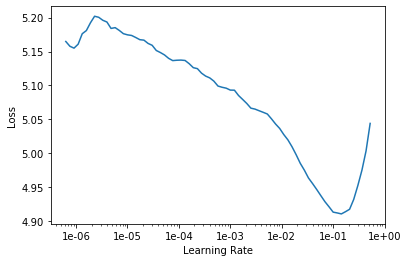

In [17]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [18]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.955267,3.822090,0.329152,23:27


In [19]:
learn.save('fit_head')

In [20]:
learn.load('fit_head');

In [21]:
learn.unfreeze()

In [22]:
learn.fit_one_cycle(3, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.536250,3.582237,0.359089,23:44
1,3.486547,3.494263,0.372546,23:49
2,3.412463,3.461252,0.376970,23:46


In [23]:
learn.save('fine_tuned')

In [24]:
learn.load('fine_tuned')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (281462 items)
x: LMTextList
xxbos xxmaj explanation 
  xxmaj why the edits made under my username xxmaj hardcore xxmaj metallica xxmaj fan were reverted ? xxmaj they were n't vandalisms , just closure on some gas after i voted at xxmaj new xxmaj york xxmaj dolls xxup fac . xxmaj and please do n't remove the template from the talk page since i 'm retired xxunk,xxbos xxmaj hey man , i 'm really not trying to edit war . xxmaj it 's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page . xxmaj he seems to care more about the formatting than the actual info .,xxbos " 
  xxmaj more 
  i ca n't make any real suggestions on improvement - i wondered if the section statistics should be later on , or a subsection of " " types of accidents " " xxup -i think the references may need tidying so that they are all in the exact same format ie date format etc . i can do that later on 

In [25]:
TEXT= "I liked this movie because"
N_WORDS = 40
N_SENTENCES = 2

In [26]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

I liked this movie because it 's not WP : OR . xxbos David Duke hates people . He is thinking that if the world is n't perfect , then if his name is a terrorist , i will delete
I liked this movie because it was a very good movie . The book is HUGE and is not only a good watch but also a FA . The Disney Channel is a classic example of how Disney


In [27]:
learn.save_encoder('fine_tuned_enc')

In [28]:
test = pd.read_csv(path/"test.csv")
test_datalist = TextList.from_df(test, cols='comment_text')

In [29]:
data_cls = (TextList.from_csv(path, 'train.csv', cols='comment_text', vocab=data_lm.vocab)
                .split_by_rand_pct(valid_pct=0.1)
                .label_from_df(cols=['toxic', 'severe_toxic','obscene', 'threat', 'insult', 'identity_hate'], label_cls=MultiCategoryList, one_hot=True)
                .add_test(test_datalist)
                .databunch())
data_cls.save('data_clas.pkl')

In [30]:
data_clas = load_data(path, 'data_clas.pkl', bs=bs)

In [31]:
data_clas.show_batch()

text,target
xxbos xxmaj take that ! \n \n xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in,toxic;severe_toxic;obscene
xxbos xxmaj small penis xxrep 5 / xxmaj small penis xxrep 5 / xxmaj small penis xxrep 5 / xxmaj small penis xxrep 5 / xxmaj small penis xxrep 5 / xxmaj small penis xxrep 5 / xxmaj small penis xxrep 5 / xxmaj small penis xxrep 5 / xxmaj small penis xxrep 5 / xxmaj small penis xxrep 5 / xxmaj small penis xxrep 5 / xxmaj small penis,toxic;severe_toxic;obscene;insult
"xxbos "" \n \n xxmaj chameleon rapes xxmaj michele ( because she thinks he 's xxmaj peter when they "" "" it "" "" on the kitchen floor ) a mention of this would be nice . xxmaj and the fact it was later xxunk . — xxmaj preceding unsigned comment added by xxunk ( talk ) \n \n xxmaj the xxmaj chameleon ( xxmaj dmitri xxmaj smerdyakov",
"xxbos "" \n \n xxmaj regrettably , i have to agree about the xxmaj gameplay section . xxmaj it comes off more like an academic discourse on the incorporation of multiple characters and changes from previous franchise entries in video games , using xxmaj mother 3 as an example , than a proper encyclopedic entry . i wo n't xxunk just for this , but i do want it",
"xxbos xxmaj in addition , you may want to read this source as presented by author xxmaj mike xxmaj campbell : \n \n xxmaj the xxup tighar - xxmaj nikumaroro xxmaj fiasco \n xxmaj two years of speculation and hype came to a numbing climax on \n xxmaj march 16 , 1992 , at the xxmaj national xxmaj press xxmaj club in xxmaj washington , \n",


In [32]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (143614 items)
x: TextList
xxbos xxmaj explanation 
  xxmaj why the edits made under my username xxmaj hardcore xxmaj metallica xxmaj fan were reverted ? xxmaj they were n't vandalisms , just closure on some gas after i voted at xxmaj new xxmaj york xxmaj dolls xxup fac . xxmaj and please do n't remove the template from the talk page since i 'm retired xxunk,xxbos xxmaj xxunk ! xxmaj he matches this background colour i 'm seemingly stuck with . xxmaj thanks . ( talk ) 21:51 , xxmaj january 11 , 2016 ( xxup utc ),xxbos xxmaj hey man , i 'm really not trying to edit war . xxmaj it 's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page . xxmaj he seems to care more about the formatting than the actual info .,xxbos " 
  xxmaj more 
  i ca n't make any real suggestions on improvement - i wondered if the section statistics should be later on , or a subsection of " " types o

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


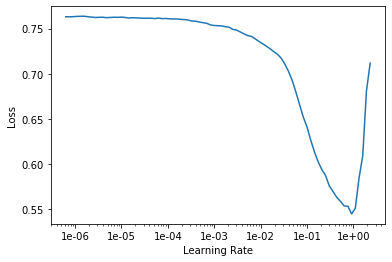

In [33]:
learn.lr_find()
learn.recorder.plot()

In [34]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,time
0,0.067486,0.058816,08:12


In [35]:
learn.save('first')

In [36]:
learn.load('first');

In [ ]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

In [ ]:
learn.save('second');
learn.load('second');

In [37]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,time
0,0.043132,0.052315,08:38


In [38]:
learn.save('third')
learn.load('third');

In [39]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,time
0,0.041321,0.039111,09:22
1,0.038181,0.038951,09:13


In [40]:
learn.predict("I really loved that movie, it was awesome!")

(MultiCategory ,
 tensor([0., 0., 0., 0., 0., 0.]),
 tensor([1.0947e-03, 4.9822e-06, 1.6397e-04, 8.1032e-06, 2.2055e-04, 3.0534e-05]))

In [41]:
learn.show_results()

text,target,prediction
xxbos xxup die xxup fag xxup die xxup fag xxup die xxup fag xxup die xxup fag xxup die xxup fag xxup die xxup fag xxup die xxup fag xxup die xxup fag xxup die xxup fag xxup die xxup fag xxup die xxup fag xxup die xxup fag xxup die xxup fag xxup die xxup fag xxup die xxup fag xxup die xxup fag xxup die xxup fag xxup,toxic,toxic;obscene;insult
xxbos xxup hate xxup you xxup hate xxup you xxup hate xxup you xxup hate xxup you xxup hate xxup you xxup hate xxup you xxup hate xxup you xxup hate xxup you xxup hate xxup you xxup hate xxup you xxup hate xxup you xxup hate xxup you xxup hate xxup you xxup hate xxup you xxup hate xxup you xxup hate xxup you xxup hate xxup you xxup,toxic;insult,toxic;insult
xxbos xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup,toxic;severe_toxic;obscene;insult,toxic;severe_toxic;obscene;insult
xxbos i xxup fucking xxup hate xxup niggers xxup and xxup spics xxup and xxup jews xxup and xxup minorities \n i xxup fucking xxup hate xxup niggers xxup and xxup spics xxup and xxup jews xxup and xxup minorities \n i xxup fucking xxup hate xxup niggers xxup and xxup spics xxup and xxup jews xxup and xxup minorities \n i xxup fucking xxup hate xxup,toxic;obscene;insult;identity_hate,toxic;severe_toxic;obscene;threat;insult;identity_hate
xxbos 7 > xxup stop xxup editing xxup my xxup posts xxup dipshit \n i xxup have a xxup right xxup to xxup state xxup my xxup opinion xxup and i xxup dont xxup give a xxup shit xxup what xxup you xxup consider xxup vandalism xxup you xxup worthless xxup admin xxup power xxup trip xxup piece xxup of xxup shit \n \n xxup stop xxup editing,toxic,toxic;obscene;insult


In [42]:
preds, target = learn.get_preds(DatasetType.Test, ordered=True)
labels = preds.numpy()

In [43]:
labels

array([[9.853014e-01, 1.916712e-01, 9.661143e-01, 2.488904e-02, 8.888917e-01, 3.504996e-01],
       [7.846234e-04, 9.661188e-06, 2.024319e-04, 1.884610e-05, 2.360570e-04, 3.965386e-05],
       [2.521018e-03, 1.440618e-04, 1.019690e-03, 1.023097e-04, 9.523460e-04, 1.969047e-04],
       [1.419845e-04, 2.642054e-06, 3.708663e-05, 2.116346e-05, 7.710426e-05, 7.021386e-06],
       ...,
       [3.582777e-02, 5.387345e-04, 5.959809e-03, 7.535973e-04, 6.644778e-03, 1.624906e-03],
       [2.382053e-03, 2.452511e-05, 5.670910e-04, 3.186099e-05, 5.937580e-04, 1.258073e-04],
       [3.166915e-03, 3.268434e-05, 7.216686e-04, 1.290494e-04, 8.429604e-04, 9.176571e-04],
       [9.441187e-01, 2.838641e-03, 6.779203e-01, 1.455754e-04, 2.341189e-01, 9.217550e-04]], dtype=float32)

In [44]:
test_id = test['id']
label_cols = ['toxic', 'severe_toxic' , 'obscene' , 'threat' , 'insult' , 'identity_hate']

submission = pd.DataFrame({'id': test_id})
submission = pd.concat([submission, pd.DataFrame(preds.numpy(), columns = label_cols)], axis=1)

submission.to_csv('submission.csv', index=False)
submission.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.985301,0.191671,0.966114,0.024889,0.888892,0.350500
1,0000247867823ef7,0.000785,0.000010,0.000202,0.000019,0.000236,0.000040
2,00013b17ad220c46,0.002521,0.000144,0.001020,0.000102,0.000952,0.000197
3,00017563c3f7919a,0.000142,0.000003,0.000037,0.000021,0.000077,0.000007
4,00017695ad8997eb,0.003373,0.000035,0.000427,0.000052,0.000552,0.000062


In [ ]:
path.ls()